In [42]:
from os import path as osp
from glob import glob
import numpy as np
import torch, os
from PIL import Image
from matplotlib import pyplot as plt

# Check number of Data

In [104]:
root = "data"
path_im = "PNGImages"
path_mk = "PedMasks"
ims_paths = glob(f"{osp.join(root, path_im)}/*")
masks_paths = glob(f"{osp.join(root, path_mk)}/*")
images = list(sorted(os.listdir(osp.join(root, "PNGImages"))))
test = sorted([osp.basename(i) for i in ims_paths])
print(f"There are {len(ims_paths)} images in the dataset!")
print(f"There are {len(masks_paths)} masks in the dataset!")

There are 170 images in the dataset!
There are 170 masks in the dataset!


# Images Analysis

(461, 504)


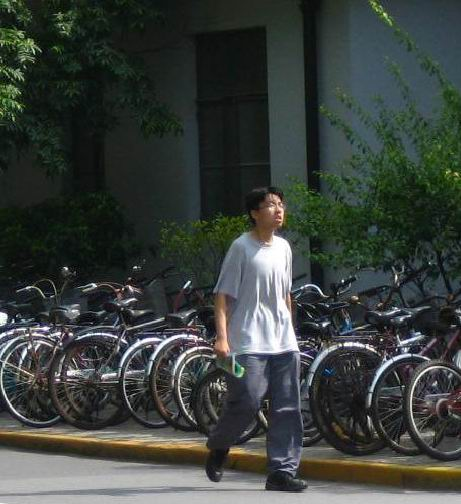

(428, 375)


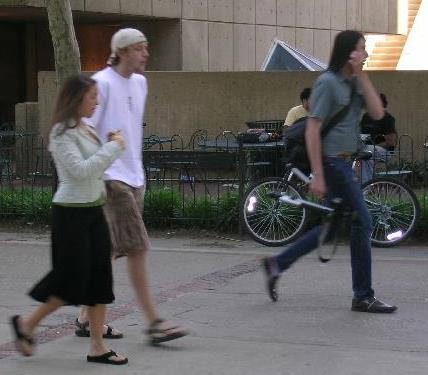

(370, 318)


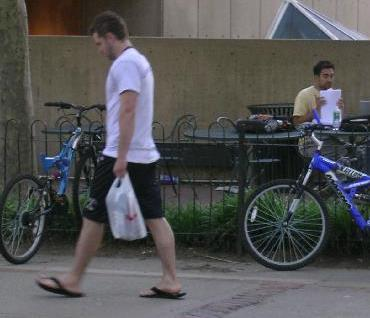

In [35]:
for i, path in enumerate(ims_paths):
    if i == 3:
        break
    im = Image.open(path).convert("RGB")
    print(im.size)
    display(im)

# Masks Analysis

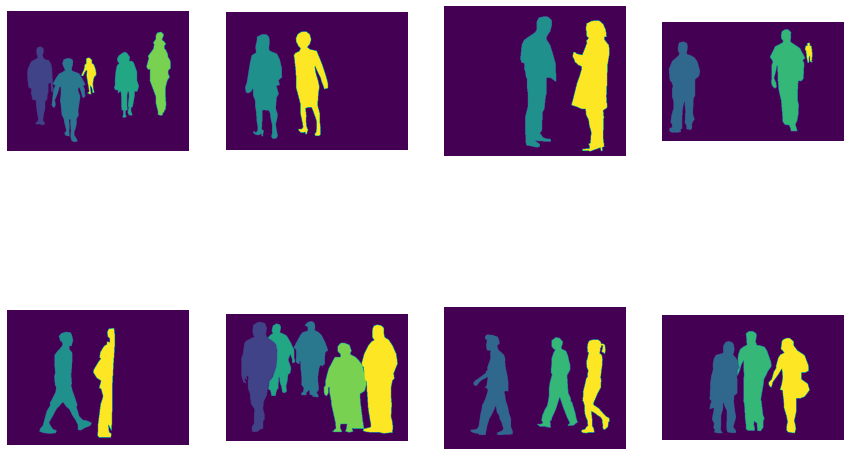

In [71]:
num = 8
plt.figure(figsize=(15,10))
for i, path in enumerate(masks_paths):
    if i == num:
        break
    mask = Image.open(path)
    if num % 2 == 0:
        plt.subplot(2, int(num / 2), i + 1)
        plt.imshow(mask)
        plt.axis('off')
    else:
        plt.subplot(1, num, i + 1)
        plt.imshow(mask)
        plt.axis('off')

In [106]:
for i, path in enumerate(masks_paths):
    
    if i == 1: break
    mask = np.array(Image.open(path))
    # get objects using unique values
    objects = np.unique(mask)
    # remove beckground class (0)
    objects = objects[1:]
    # create instance segmentation masks
    masks = mask == objects[:, None, None]
    masks = torch.as_tensor(masks, dtype=torch.uint8)
    
    # get bounding boxes
    num_objects = len(objects)
    boxes = []
    for num_object in range(num_objects):
        box = np.where(masks[num_object])
        # print(box)
        xmin = np.min(box[1])
        xmax = np.max(box[1])
        ymin = np.min(box[0])
        ymax = np.max(box[0])
        boxes.append([xmin, xmax, ymin, ymax])
    # convert boxes to tensor
    boxes = torch.as_tensor(boxes, dtype=torch.float32)
    print(boxes)
    
    # get labels: there is only one class so we use torch.ones()
    labels = torch.ones((num_objects, ), dtype=torch.int64)
    print(labels)
        

tensor([[ 76., 174., 136., 427.],
        [168., 293., 180., 490.],
        [402., 493., 156., 399.],
        [523., 612.,  82., 392.],
        [278., 333., 178., 313.]])
tensor([1, 1, 1, 1, 1])


In [90]:
aaa = [76., 174., 136., 427.]
print((aaa[3] - aaa[1]) * (aaa[2] - aaa[0]))

15180.0
